In [5]:
#0.Tải và sử dụng pandas
import pandas as pd
# Đọc dữ liệu từ CSV
df = pd.read_csv(r"D:\HocKy3_2024_2025\KhoaHocDuLieu\BaiTapNop\HaHuyNam_K215480106063_KhoaHocDuLieu_21_04_2025\PhanCumKhachHang\Mall_Customers.csv")
# Kiểm tra thông tin dữ liệu
print(df.info())  # Kiểm tra giá trị thiếu
print(df.head())  # Hiển thị 5 dòng đầu tiên

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
#1.Phân cụm khách hàng dựa trên Annual Income và Spending Score. so cum - n_cluster=3
from sklearn.cluster import KMeans
# Chọn đặc trưng để phân cụm
X_cluster = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# Khởi tạo KMeans với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_cluster)
print(df[["Annual Income (k$)", "Spending Score (1-100)", "Cluster"]].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        2
2                  16                       6        2
3                  16                      77        2
4                  17                      40        2


In [7]:
#2.Tao dac trung moi: giup xac dinh muc thu nhap so voi do tuoi
df["income_to_age"] = df["Annual Income (k$)"] / df["Age"]
print(df[["Age", "Annual Income (k$)", "income_to_age"]].head())

   Age  Annual Income (k$)  income_to_age
0   19                  15       0.789474
1   21                  15       0.714286
2   20                  16       0.800000
3   23                  16       0.695652
4   31                  17       0.548387


In [8]:
#3.Huấn luyện Gaussian Naive Bayes: để phân loại khách hàng dựa trên các đặc trưng
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Chọn đặc trưng gốc
X_base = df[["Annual Income (k$)", "Spending Score (1-100)"]]
y = df["Cluster"]
# Chọn đặc trưng nâng cao
X_advanced = df[["Annual Income (k$)", "Spending Score (1-100)", "income_to_age"]]
# Chia dữ liệu thành Train/Test
X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
X_train_adv, X_test_adv, _, _ = train_test_split(X_advanced, y, test_size=0.2, random_state=42)
# Khởi tạo GaussianNB
gnb_base = GaussianNB()
gnb_adv = GaussianNB()
# Huấn luyện mô hình
gnb_base.fit(X_train_base, y_train)
gnb_adv.fit(X_train_adv, y_train)
# Dự đoán
y_pred_base = gnb_base.predict(X_test_base)
y_pred_adv = gnb_adv.predict(X_test_adv)
# Đánh giá hiệu suất
acc_base = accuracy_score(y_test, y_pred_base)
acc_adv = accuracy_score(y_test, y_pred_adv)
print(f"Độ chính xác (Không có income_to_age): {acc_base}")
print(f"Độ chính xác (Có income_to_age): {acc_adv}")

Độ chính xác (Không có income_to_age): 0.95
Độ chính xác (Có income_to_age): 1.0


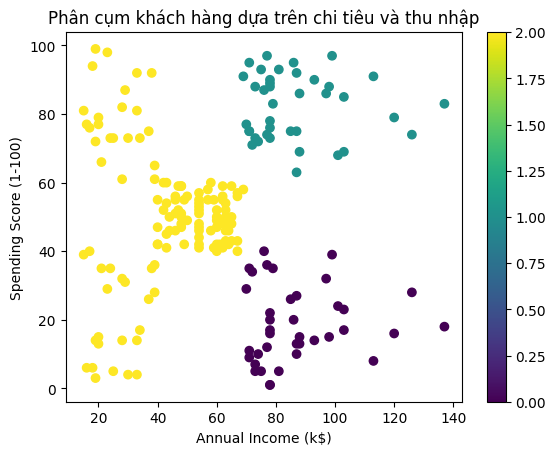

In [ ]:
#4.Vẽ biểu đồ trực quan
import matplotlib.pyplot as plt
# Vẽ phân cụm với dữ liệu gốc
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Phân cụm khách hàng dựa trên chi tiêu và thu nhập")
plt.colorbar()
plt.show()